# Preprocessing data

In [105]:
import pandas as pd
import json
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('dataset\data-review-final.csv')
df.shape

(954, 32)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   input_id            954 non-null    object 
 1   link                0 non-null      float64
 2   title               954 non-null    object 
 3   category            953 non-null    object 
 4   address             954 non-null    object 
 5   open_hours          954 non-null    object 
 6   popular_times       954 non-null    object 
 7   website             173 non-null    object 
 8   phone               319 non-null    object 
 9   plus_code           501 non-null    object 
 10  review_count        954 non-null    int64  
 11  review_rating       954 non-null    float64
 12  reviews_per_rating  954 non-null    object 
 13  latitude            954 non-null    float64
 14  longitude           954 non-null    float64
 15  cid                 954 non-null    uint64 
 16  status  

In [108]:
df.head()

,input_id,link,title,category,address,open_hours,popular_times,website,phone,plus_code,...,data_id,images,reservations,order_online,menu,owner,complete_address,about,user_reviews,emails
0,0fff97bc-cece-4edd-ab0d-b4ad6eb62860,NaN,Vihara Dhamma Sundara,Buddhist temple,"Jl. Ir. Juanda No.223B, Pucangsawit, Jebres, S...","{""Friday"":[""9.00 am–5.00 pm""],""Monday"":[""9.00 ...",{},NaN,(0271) 643749,"CRJX+3G Pucangsawit, Surakarta City, Central Java",...,0x2e7a16582f12c515:0x16fa374ebaeeeecd,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""111828298465089363475"",""name"":""Vihara D...","{""borough"":""Pucangsawit, Jebres"",""street"":""Jl....","[{""id"":""accessibility"",""name"":""Accessibility"",...","[{""Name"":""Mettaxiumei"",""ProfilePicture"":""https...",NaN
1,0fff97bc-cece-4edd-ab0d-b4ad6eb62860,NaN,Tirtonadi Park,Park,"Jl. A. Yani, Gilingan, Banjarsari, Surakarta C...","{""Friday"":[""Open 24 hours""],""Monday"":[""Open 24...","{""Friday"":{""0"":33,""1"":20,""10"":5,""11"":5,""12"":6,...",NaN,NaN,"CRXC+95 Gilingan, Surakarta City, Central Java",...,0x2e7a1697336d25e1:0x9e965d10ffb23cc2,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""104418315103655540738"",""name"":""Tirtonad...","{""borough"":""Gilingan, Banjarsari"",""street"":""Jl...","[{""id"":""accessibility"",""name"":""Accessibility"",...","[{""Name"":""M Bad."",""ProfilePicture"":""https://lh...",NaN
2,0fff97bc-cece-4edd-ab0d-b4ad6eb62860,NaN,Ngarsopuro Night Market,Night market,"Jl. Diponegoro, Keprabon, Banjarsari, Surakart...","{""Friday"":[""5.00–11.00 pm""],""Monday"":[""Closed""...",{},NaN,0838-1943-4232,"CRJC+GW Keprabon, Surakarta City, Central Java",...,0x2e7a166287cccb57:0xbba4b465bfa08dcc,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""109298893982878160837"",""name"":""Ngarsopu...","{""borough"":""Keprabon, Banjarsari"",""street"":""Jl...","[{""id"":""service_options"",""name"":""Service optio...","[{""Name"":""Putra Satria"",""ProfilePicture"":""http...",NaN
3,0fff97bc-cece-4edd-ab0d-b4ad6eb62860,NaN,Sriwedari Park,Park,"Slamet Riyadi St No.275, Sriwedari, Laweyan, S...","{""Friday"":[""Open 24 hours""],""Monday"":[""Open 24...","{""Friday"":{""0"":5,""1"":2,""10"":9,""11"":10,""12"":10,...",NaN,NaN,"CRJ7+H5 Sriwedari, Surakarta City, Central Java",...,0x2e7a1680a93d3af1:0x7e1dfa994e59efcf,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""Sriwedari Park (Owner)"",""link...","{""borough"":""Sriwedari, Laweyan"",""street"":""Slam...","[{""id"":""accessibility"",""name"":""Accessibility"",...","[{""Name"":""Desy Natalia"",""ProfilePicture"":""http...",NaN
4,0fff97bc-cece-4edd-ab0d-b4ad6eb62860,NaN,Monument 45 Banjarsari Park,Memorial park,"CRQG+RHP Monument 45 Banjarsari Park, Setabela...","{""Friday"":[""Open 24 hours""],""Monday"":[""Open 24...","{""Friday"":{""0"":12,""1"":8,""10"":64,""11"":55,""12"":4...",http://surakarta.go.id/,NaN,NaN,...,0x2e7a168c33aa2a01:0x3c93de4d15b801f9,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""Monument 45 Banjarsari Park (...","{""borough"":""Setabelan, Banjarsari"",""street"":""C...","[{""id"":""accessibility"",""name"":""Accessibility"",...","[{""Name"":""Marsepti Ndaruwati"",""ProfilePicture""...",NaN


In [109]:
col = ['title','user_reviews']
for i in df.columns:
    if i not in col:
        df.drop(i, inplace=True, axis=1)

df.head()

,title,user_reviews
0,Vihara Dhamma Sundara,"[{""Name"":""Mettaxiumei"",""ProfilePicture"":""https..."
1,Tirtonadi Park,"[{""Name"":""M Bad."",""ProfilePicture"":""https://lh..."
2,Ngarsopuro Night Market,"[{""Name"":""Putra Satria"",""ProfilePicture"":""http..."
3,Sriwedari Park,"[{""Name"":""Desy Natalia"",""ProfilePicture"":""http..."
4,Monument 45 Banjarsari Park,"[{""Name"":""Marsepti Ndaruwati"",""ProfilePicture""..."


In [110]:
# ekstrak rating dan desksripsi dari user_reviews

rating = []
description = []

for i in df['user_reviews']:
    if isinstance(i,str):
        reviews = json.loads(i)
        for review in reviews:
            rating.append(review['Rating'])
            description.append(review['Description'])

df_clean = pd.DataFrame({'Rating' : rating, 'Description' : description})
df_clean.info()
            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7209 entries, 0 to 7208
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rating       7209 non-null   int64 
 1   Description  7209 non-null   object
dtypes: int64(1), object(1)
memory usage: 112.8+ KB


In [111]:
# df_clean.to_csv('dataset/clean_review.csv', index=False)

# EDA

In [112]:
df_clean.head()

,Rating,Description
0,5,Ikut Kathina di Vihara Dhamma sundara^^\n\nVih...
1,5,"Tempatnya nampak sepi walaupun akan ada acara,..."
2,5,Tempatnya bagus dan rapih. Namun saat ke sana ...
3,5,"Ini Rumah ibadah untuk Umat Budha, Tapi diperb..."
4,3,Untuk ibadah ckp kecil tp tempat luas..\nKesin...


In [113]:
df_clean['Rating'].value_counts()

Rating
5    4554
4    1751
3     618
1     158
2     128
Name: count, dtype: int64

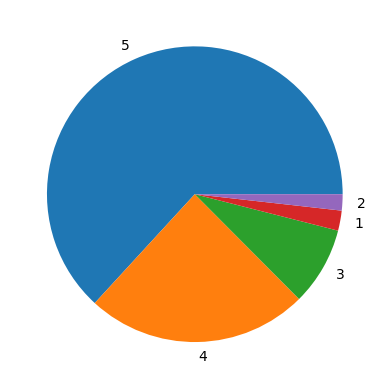

In [114]:
labels = df_clean['Rating'].value_counts().index
plt.pie(df_clean['Rating'].value_counts(), labels=labels)
plt.show()


data tidak seimbang, maka lakukan resampling dengan downsampling

In [115]:
# resampling dengan downsampling
df_5 = df_clean[df_clean['Rating'] == 5]
df_4 = df_clean[df_clean['Rating'] == 4]
df_3 = df_clean[df_clean['Rating'] == 3]
df_2 = df_clean[df_clean['Rating'] == 2]
df_1 = df_clean[df_clean['Rating'] == 1]

In [116]:
#Menentukan ukuran sampling

reduce_sample = 160

In [117]:
# Melakukan downsampling pada kelas mayoritas
df_5_downsampled = resample(df_5, replace=False, n_samples=reduce_sample, random_state=123)
df_4_downsampled = resample(df_4, replace=False, n_samples=reduce_sample, random_state=123)
df_3_downsampled = resample(df_3, replace=False, n_samples=reduce_sample, random_state=123)

In [118]:
df_balance = pd.concat([df_5_downsampled, df_4_downsampled, df_3_downsampled, df_2, df_1])

In [119]:
df_balance.head()

,Rating,Description
5948,5,Klenteng Ban Hin Kiong merupakan Klenteng tert...
4955,5,Airnya sejuk. Tempatnya bebas plastik. Bagi ya...
1671,5,Tiap minggu pasti kesini buat foto2 doang😁 kar...
3592,5,"Pernah kesana pergi liat bunker jepang, naik p..."
1163,5,"Mengikuti Talkshow "" Menyingkap Pesona Wastra ..."


In [120]:
df_balance = df_balance.reset_index(drop=True)

In [121]:
df_balance['Rating'].value_counts()

Rating
5    160
4    160
3    160
1    158
2    128
Name: count, dtype: int64

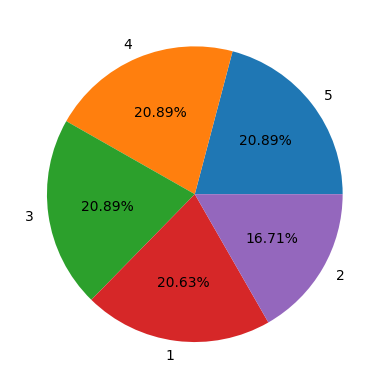

In [122]:
plt.pie(df_balance['Rating'].value_counts(), 
        labels=df_balance['Rating'].value_counts().index, 
        autopct='%0.2f%%')
plt.show()

In [123]:
df_balance['Rating'].value_counts().sort_index()

Rating
1    158
2    128
3    160
4    160
5    160
Name: count, dtype: int64

In [124]:
df_balance.head()

,Rating,Description
0,5,Klenteng Ban Hin Kiong merupakan Klenteng tert...
1,5,Airnya sejuk. Tempatnya bebas plastik. Bagi ya...
2,5,Tiap minggu pasti kesini buat foto2 doang😁 kar...
3,5,"Pernah kesana pergi liat bunker jepang, naik p..."
4,5,"Mengikuti Talkshow "" Menyingkap Pesona Wastra ..."


download file csv yang telah seimbang

In [126]:
# df_balance = pd.DataFrame(df_balance)
# df_balance.to_csv('dataset/balance.csv', index=False)

In [127]:
df_balance.head()

,Rating,Description
0,5,Klenteng Ban Hin Kiong merupakan Klenteng tert...
1,5,Airnya sejuk. Tempatnya bebas plastik. Bagi ya...
2,5,Tiap minggu pasti kesini buat foto2 doang😁 kar...
3,5,"Pernah kesana pergi liat bunker jepang, naik p..."
4,5,"Mengikuti Talkshow "" Menyingkap Pesona Wastra ..."
